In [3]:
# Some standard import statements that are nice for Jupyter

import sys
import os
import logging

import numpy as np

from scipy.optimize import curve_fit

%load_ext autoreload
%autoreload 2

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.dpi'] = 200

import time

import json

logging.basicConfig(level=logging.INFO, stream=sys.stdout)

# importing my model functions for analysis
from psi_transmission.model import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Storage Lifetime

We anticipate that pre-storage lifetime measurements should be largely unaffected by changing the installed guide. The total counts may change, but the decay constant $\tau$ should agree from configuration to configuration. This notebook will be broken up by configuration, with lifetime measurements calculated for each set up.

## Normalization Configuration

The relevant runs are:

Run #'s                      | Day |  Storage Time (s)   | Configuration          |
---                          | --- |      ---            | ---                    |
 22 - 24                     | 8   |       20            | normalization          |
 25 - 31                     | 8   |      100            | normalization          |
 32 - 35                     | 8   |        5            | normalization          |
 77 - 79                     | 8   |        5            | normalization          |
 80 - 82                     | 8   |       20            | normalization          |
 83 - 88                     | 8   |      100            | normalization          |
121 - 123                    | 9   |        5            | normalization          |
124 - 125                    | 9   |       20            | normalization          |
      127                    | 9   |       20            | normalization          |
128 - 135                    | 9   |      100            | normalization          |
176 - 183                    | 9   |      100            | normalization          |
184 - 186                    | 9   |       20            | normalization          |
187 - 189                    | 9   |        5            | normalization          |
123 - 130                    | 10  |      100            | normalization          |
131 - 133                    | 10  |       20            | normalization          |
134 - 136                    | 10  |        5            | normalization          |
171 - 179                    | 10  |      100            | normalization          |
180 - 182                    | 10  |       20            | normalization          |
183 - 185                    | 10  |        5            | normalization          |
250 - 252                    | 10  |        5            | normalization          |
253 - 255                    | 10  |       20            | normalization          |
256 - 265                    | 10  |      100            | normalization          |

After applying the source performance normalization to all of these runs, they can be plotted with respect to their storage times.

In [53]:
config = 'NORM'

data_5    = load_data_2(config, 's005', normalize_flag = True)
data_20   = load_data_2(config, 's020', normalize_flag = True)
data_100  = load_data_2(config, 's100', normalize_flag = True)
data_list = [data_5, data_20, data_100]

# fit function for the exponential decay of counts with storage time
def storage_lt_fit(t, N_0, tau):
    return N_0 * np.exp(-t / tau)

In [82]:
data_100

array([[1.08815000e+05, 1.00000000e+02, 5.29124575e+03, 7.27409496e+01,
        8.02500000e+00],
       [1.09116000e+05, 1.00000000e+02, 5.32363606e+03, 7.29632514e+01,
        8.02600000e+00],
       [1.09416000e+05, 1.00000000e+02, 5.20013576e+03, 7.21119668e+01,
        8.02700000e+00],
       [1.09717000e+05, 1.00000000e+02, 5.35439489e+03, 7.31737309e+01,
        8.02800000e+00],
       [1.10017000e+05, 1.00000000e+02, 5.51492626e+03, 7.42625495e+01,
        8.02900000e+00],
       [1.10317000e+05, 1.00000000e+02, 5.37057312e+03, 7.32841942e+01,
        8.03000000e+00],
       [1.10617000e+05, 1.00000000e+02, 5.47635990e+03, 7.40024317e+01,
        8.03100000e+00],
       [1.26383000e+05, 1.00000000e+02, 5.43386776e+03, 7.37147730e+01,
        8.08300000e+00],
       [1.26683000e+05, 1.00000000e+02, 5.32369474e+03, 7.29636536e+01,
        8.08400000e+00],
       [1.26984000e+05, 1.00000000e+02, 5.58073206e+03, 7.47042975e+01,
        8.08500000e+00],
       [1.27284000e+05, 1.0000

Fit parameters:
 N_0 = 150832.3725346519 +/- 86.69016913240198,
 A: 29.34662266109522 +/- 0.018691465061588086
chi_sq / dof = 267.60661674349103


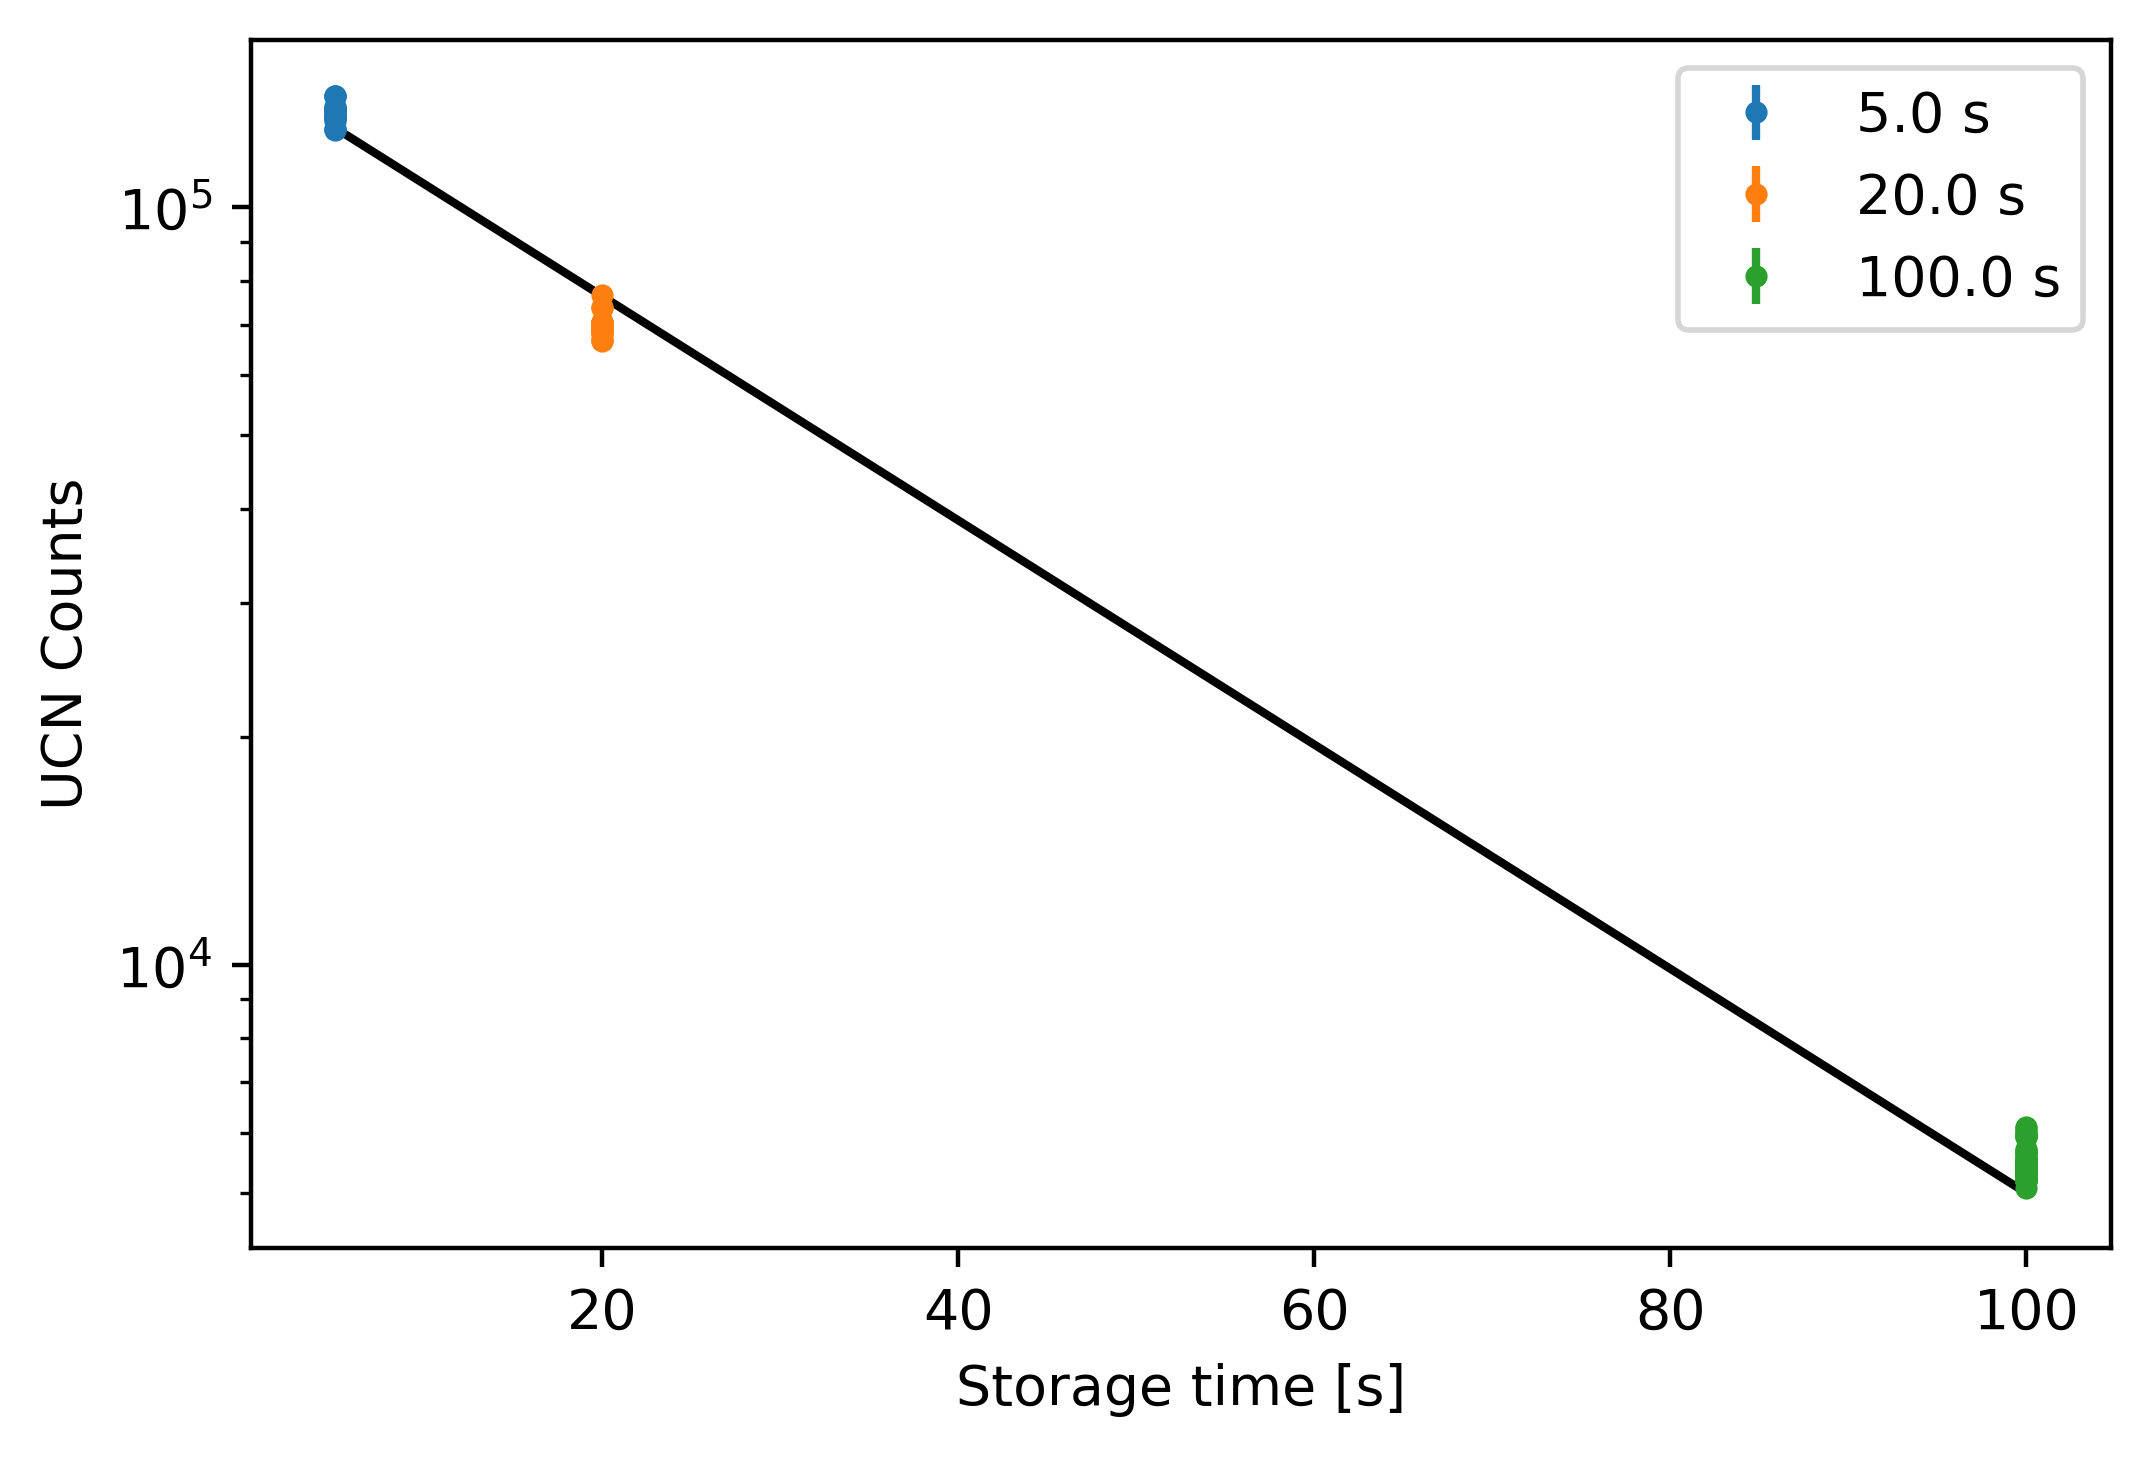

In [88]:
# Plot the three data sets
ax = plt.gca()
for arr in data_list:
    color = next(ax._get_lines.prop_cycler)['color']
    plt.errorbar(arr[:,1], arr[:,2], yerr = arr[:,3], fmt = '.', label = '{} s'.format(arr[0,1]), color = color)

# Concatenate the arrays and then fit all data to one lifetime
all_data = np.vstack((data_5, data_20))
all_data = np.vstack((all_data, data_100))
popt, pcov = curve_fit(storage_lt_fit, all_data[:,1], all_data[:,2], sigma = all_data[:,3], absolute_sigma = True)
plt.plot(all_data[:,1], storage_lt_fit(all_data[:,1], *popt), color = 'k');
plt.yscale('log')
plt.ylabel('UCN Counts');
plt.xlabel('Storage time [s]')
plt.legend();

# printing the fit parameters and their errors:
fit_parameters = np.zeros(np.shape(pcov))
for i in range(0, np.size(popt)):
    fit_parameters[i,0] = popt[i]
    fit_parameters[i,1] = np.sqrt(np.diag(pcov))[i]
print("Fit parameters:\n N_0 = {} +/- {},\n A: {} +/- {}".format(
        fit_parameters[0,0],
        fit_parameters[0,1],
        fit_parameters[1,0],
        fit_parameters[1,1]))

# Compute chi_sq
# Compute chi_sq
chi_sq_over_dof = np.sum(((all_data[:,2] - storage_lt_fit(all_data[:,1], *popt)) / all_data[:,3])**2) / (np.shape(all_data)[0] - len(popt))
print("chi_sq / dof = {}".format(chi_sq_over_dof))

The very large $\chi^2 / \text{dof}$ is hopefully just an artifact of the source normalization. The normalization of all points to the decay of the source demonstrated that there are systematics present that have not been accounted for. The small error bar on the data points presented here, relative to the spread of the points, is hopefully an additional reflection of this fact. 

Perhaps the points belonging to each storage time should be averaged? This might actually make more sense because, following normalization, we really consider them to be independent repetitions of the same measurement. 

In [102]:
#
results = np.zeros((3,3))
results[2,0] = 5
results[2,1] = 20
results[2,2] = 100

#
for i in range(0, np.shape(data_list)[0]):
    
    # compute the standard mean
    results[0,i]  = np.mean(data_list[i][:,2])
    results[1,i]  = np.std(data_list[i][:,2])

Fit parameters:
 N_0 = 165350.82160881642 +/- 17.797639801126845,
 A: 23.220943362805787 +/- 0.010367757752441994
chi_sq / dof = 1056.9752949296337


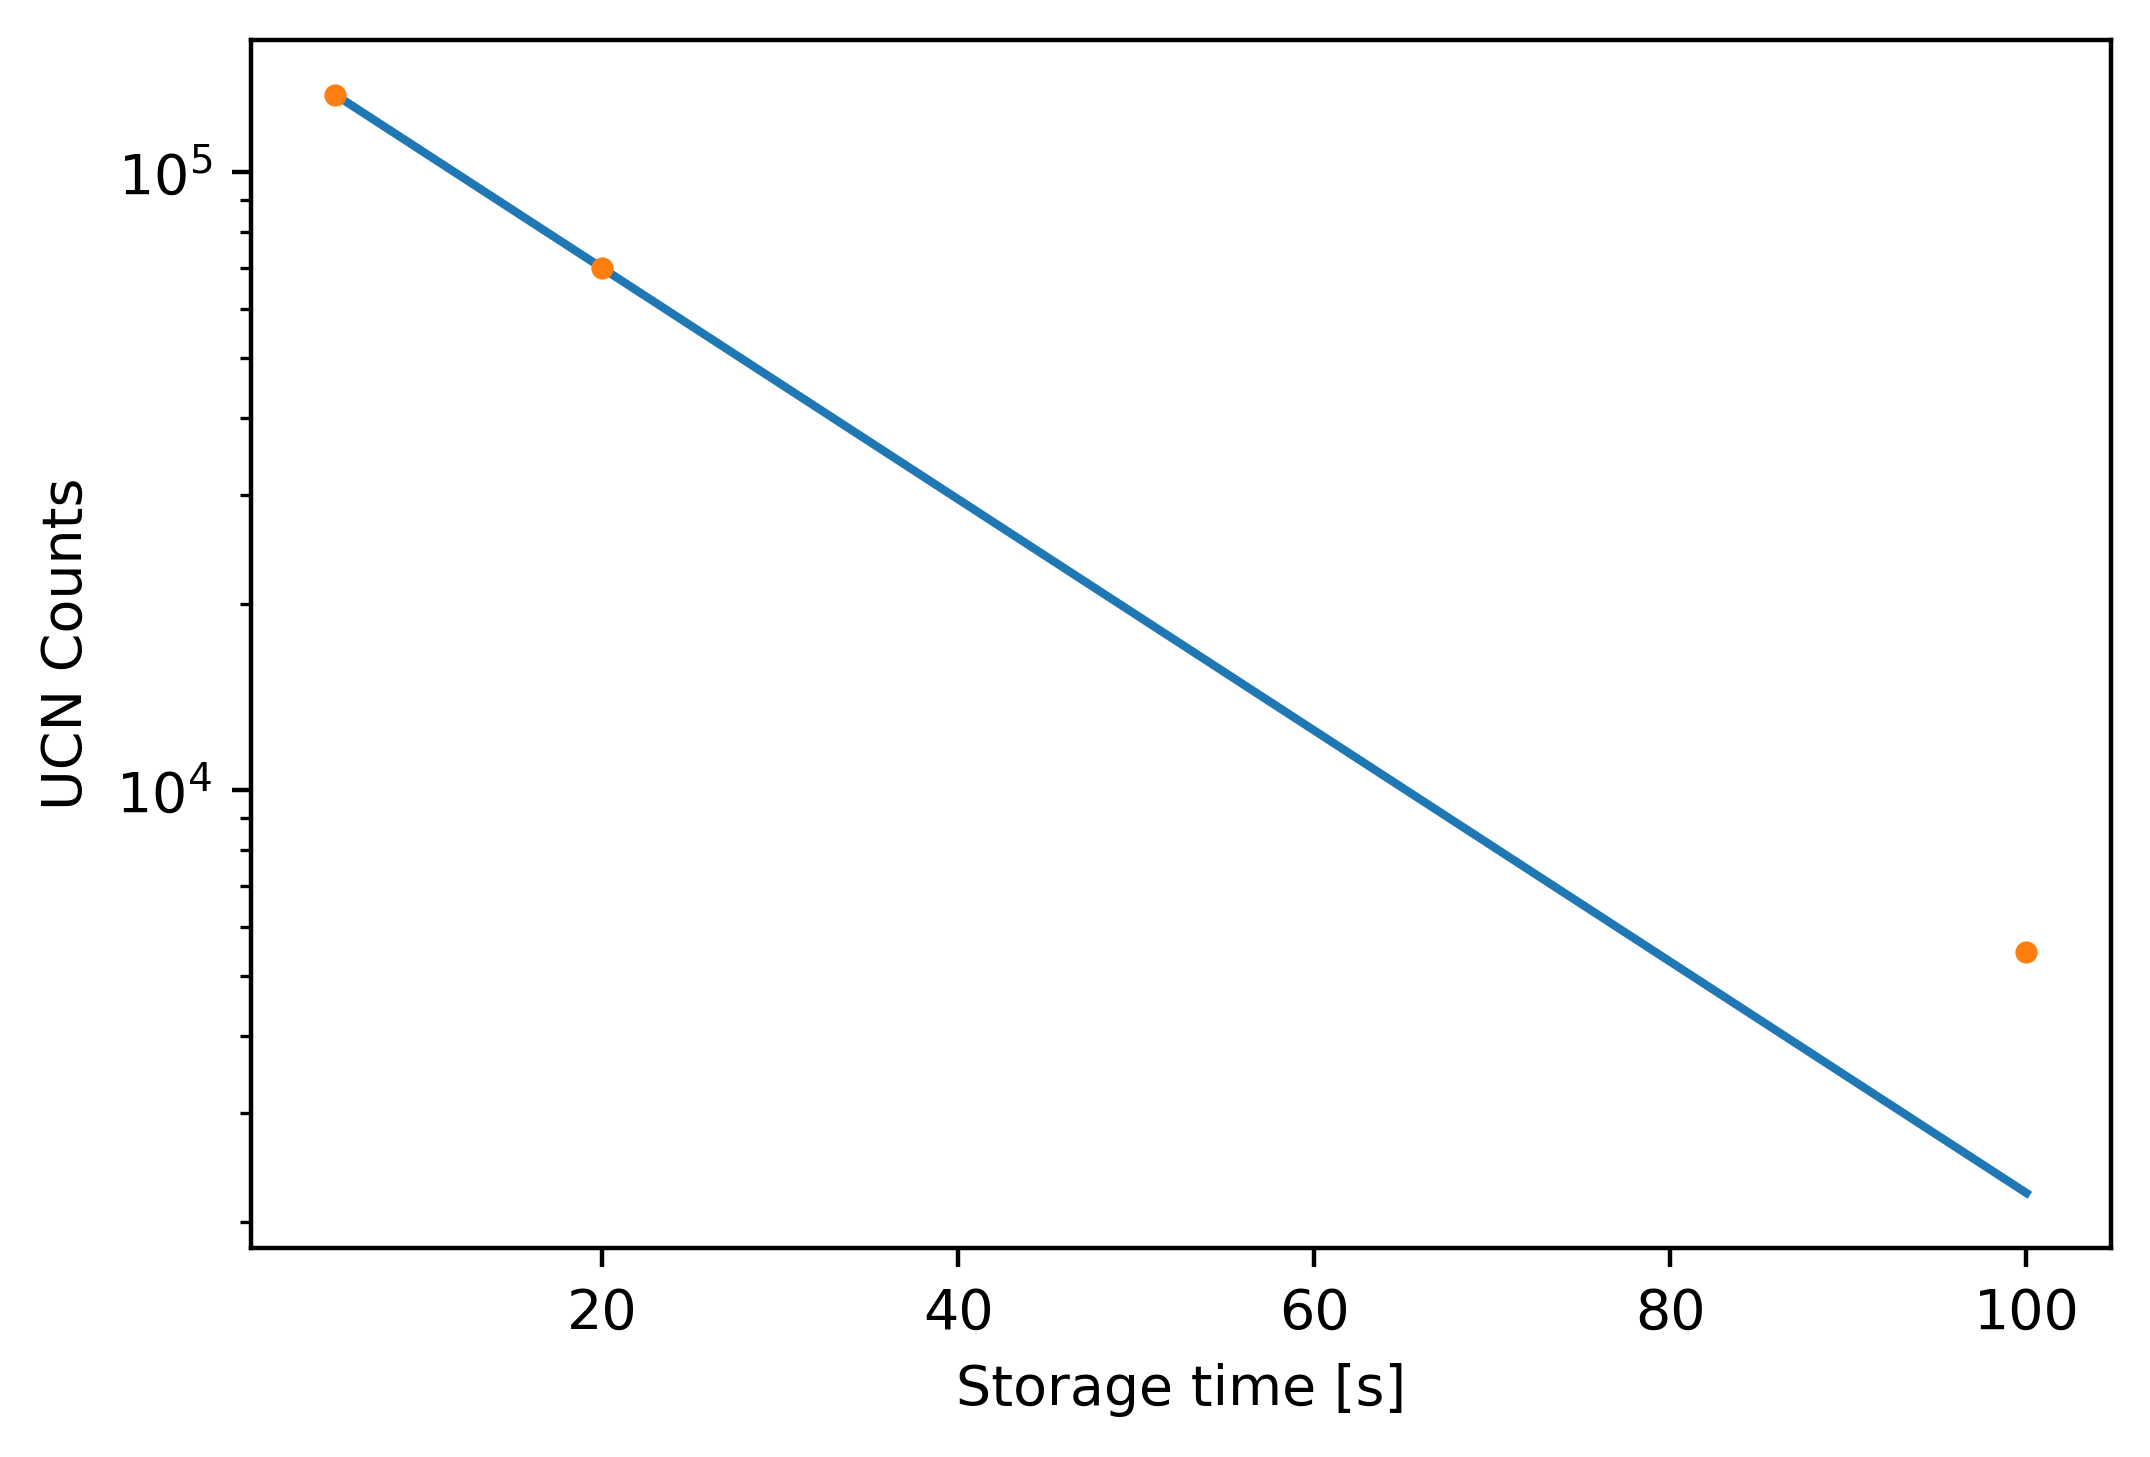

In [104]:
popt, pcov = curve_fit(storage_lt_fit, results[2,:], results[0,:], sigma = results[2,:], p0=[150000, 100], absolute_sigma = True)
plt.plot(results[2,:], storage_lt_fit(results[2,:], *popt));
plt.errorbar(results[2,:], results[0,:], yerr = results[2,:], fmt = '.')
plt.ylabel('UCN Counts');
plt.xlabel('Storage time [s]');
plt.yscale('log')

# printing the fit parameters and their errors:
fit_parameters = np.zeros(np.shape(pcov))
for i in range(0, np.size(popt)):
    fit_parameters[i,0] = popt[i]
    fit_parameters[i,1] = np.sqrt(np.diag(pcov))[i]
print("Fit parameters:\n N_0 = {} +/- {},\n A: {} +/- {}".format(
        fit_parameters[0,0],
        fit_parameters[0,1],
        fit_parameters[1,0],
        fit_parameters[1,1]))

chi_sq_over_dof = np.sum(((results[0,:] - storage_lt_fit(results[2,:], *popt)) / results[2,:])**2) / (np.shape(results)[1] - len(popt))
print("chi_sq / dof = {}".format(chi_sq_over_dof))

Am I not doing this right? Maybe we shouldn't really expect the normalization measurements to be usable in this fashion, since they will inevitably include the missing source performance systematics.

## JP SUS with NiP Guide

Relevant runs:

Run #'s                      | Day |  Storage Time (s)   | Configuration          |
---                          | --- |      ---            | ---                    |
 50 - 60                     | 8   |      100            | JP SUS guide with NiP  |
 61 - 63                     | 8   |        5            | JP SUS guide with NiP  |
 64 - 66*                    | 8   |       20            | JP SUS guide with NiP  |
 
 


Fit parameters:
 N_0 = 116802.18259078298 +/- 17.494512253903327,
 A: 23.784024027235617 +/- 0.015088481009747608
chi_sq / dof = 448.64213798850847


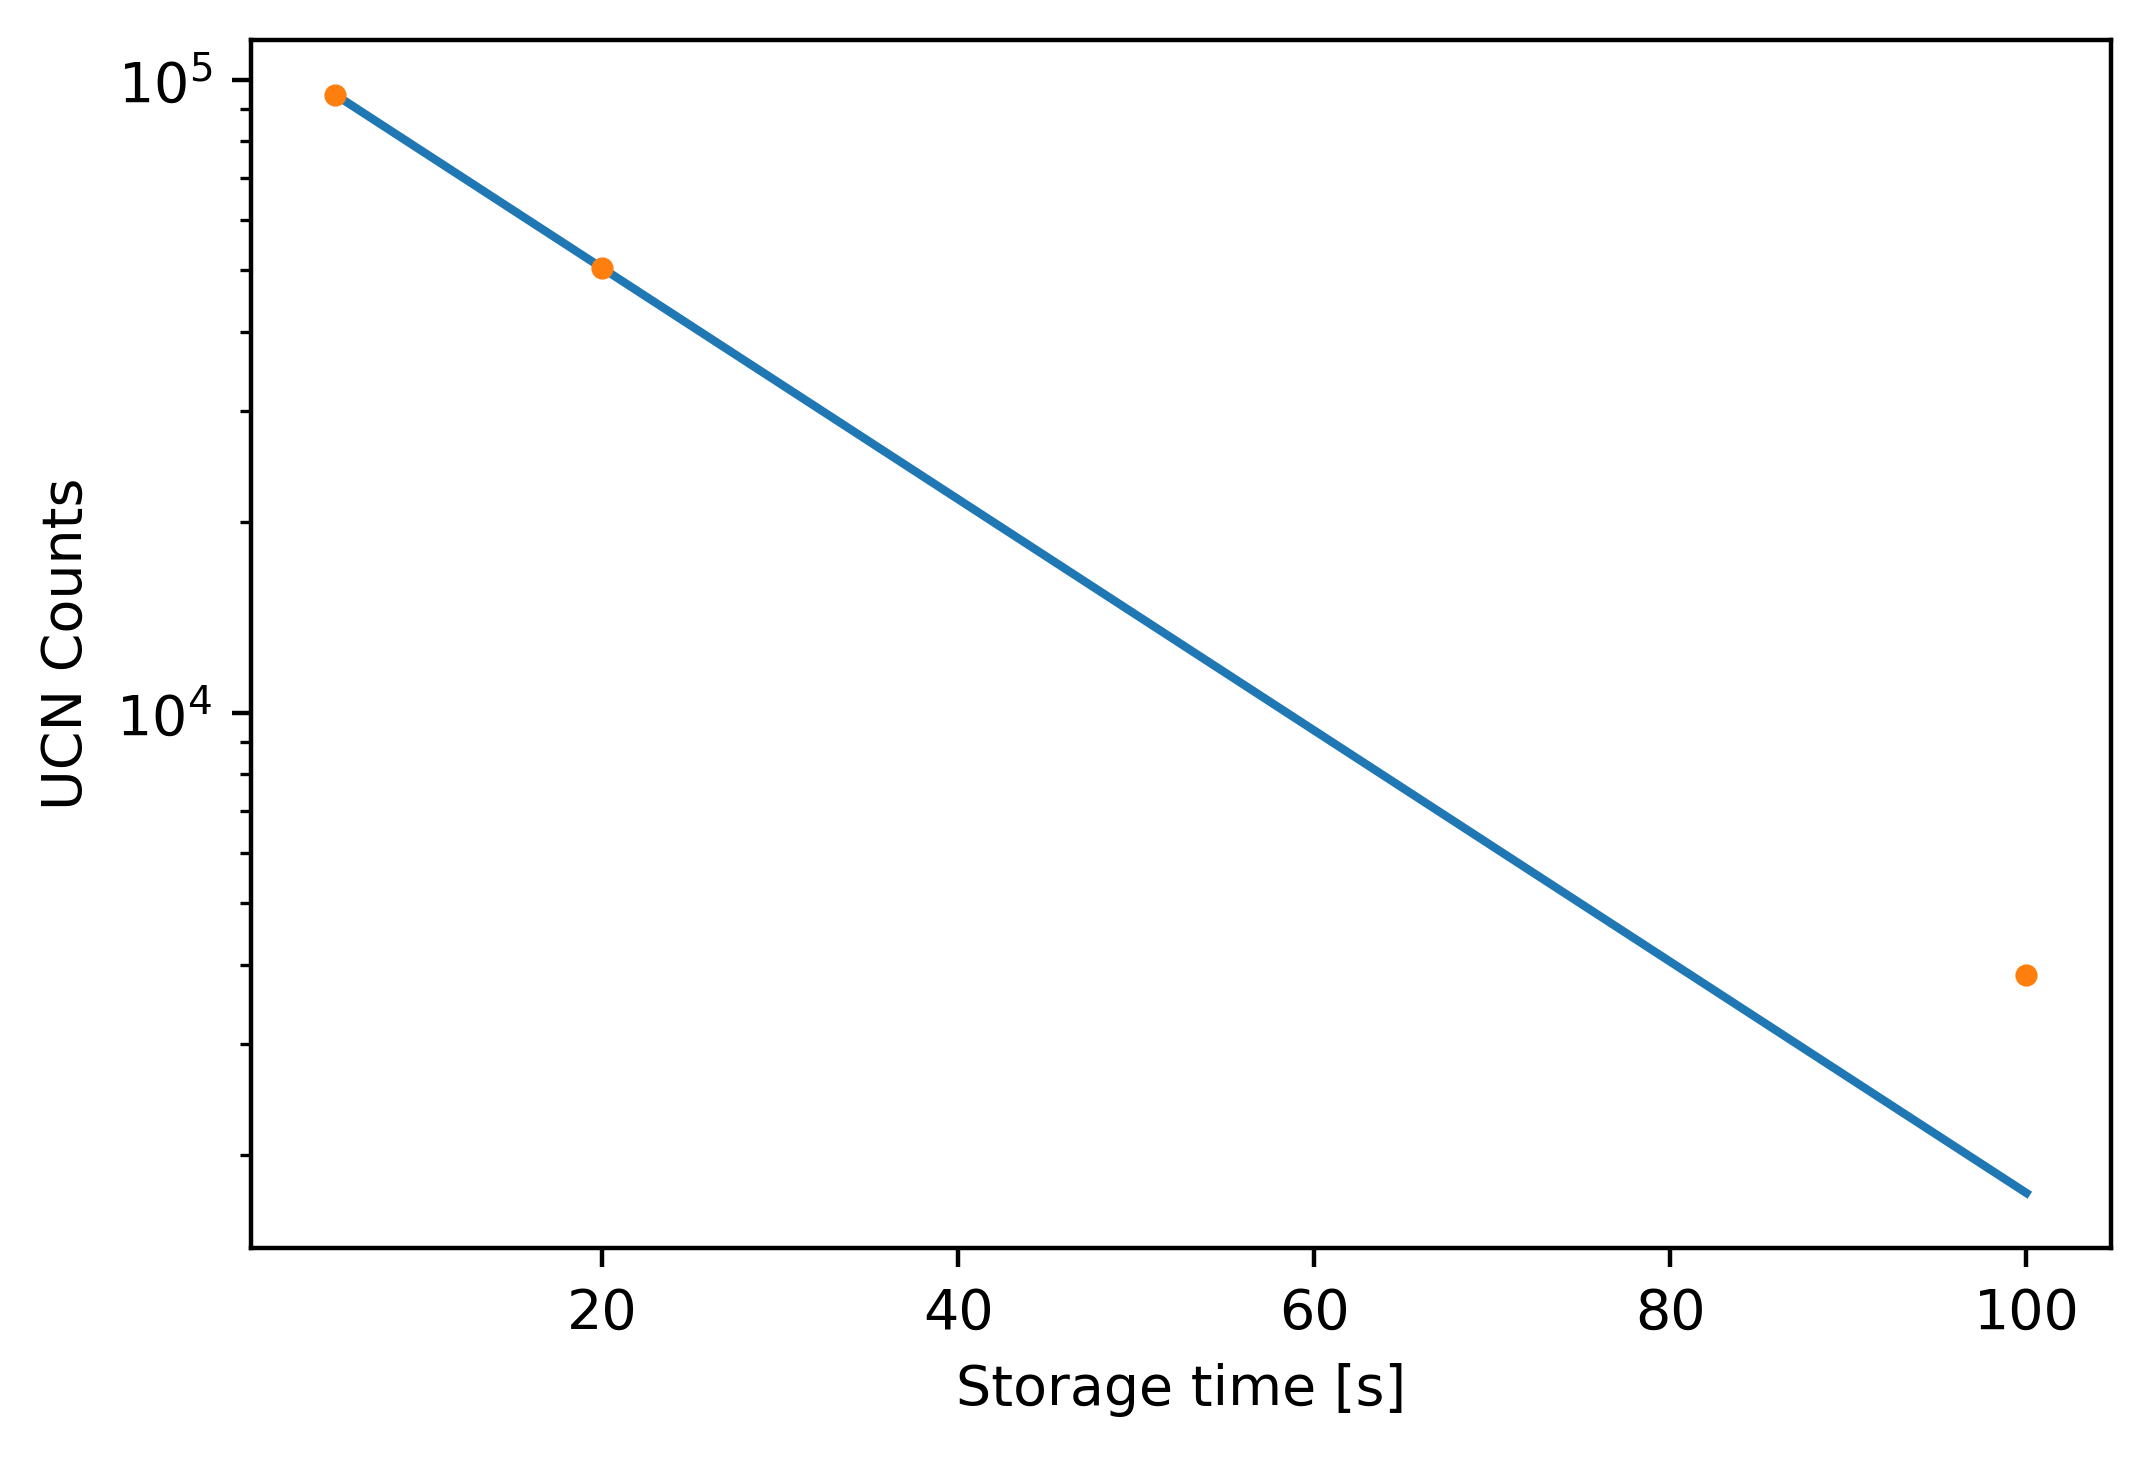

In [105]:
config = 'JPSU'

data_5    = load_data_2(config, 's005', normalize_flag = True)
data_20   = load_data_2(config, 's020', normalize_flag = True)
data_100  = load_data_2(config, 's100', normalize_flag = True)
data_list = [data_5, data_20, data_100]

#
results = np.zeros((3,3))
results[2,0] = 5
results[2,1] = 20
results[2,2] = 100

#
for i in range(0, np.shape(data_list)[0]):
    
    # compute the standard mean
    results[0,i]  = np.mean(data_list[i][:,2])
    results[1,i]  = np.std(data_list[i][:,2])
    
popt, pcov = curve_fit(storage_lt_fit, results[2,:], results[0,:], sigma = results[2,:], p0=[150000, 100], absolute_sigma = True)
plt.plot(results[2,:], storage_lt_fit(results[2,:], *popt));
plt.errorbar(results[2,:], results[0,:], yerr = results[2,:], fmt = '.')
plt.ylabel('UCN Counts');
plt.xlabel('Storage time [s]');
plt.yscale('log')

# printing the fit parameters and their errors:
fit_parameters = np.zeros(np.shape(pcov))
for i in range(0, np.size(popt)):
    fit_parameters[i,0] = popt[i]
    fit_parameters[i,1] = np.sqrt(np.diag(pcov))[i]
print("Fit parameters:\n N_0 = {} +/- {},\n A: {} +/- {}".format(
        fit_parameters[0,0],
        fit_parameters[0,1],
        fit_parameters[1,0],
        fit_parameters[1,1]))

chi_sq_over_dof = np.sum(((results[0,:] - storage_lt_fit(results[2,:], *popt)) / results[2,:])**2) / (np.shape(results)[1] - len(popt))
print("chi_sq / dof = {}".format(chi_sq_over_dof))

In [106]:
results

array([[9.46572145e+04, 5.03607860e+04, 3.85970622e+03],
       [4.07086892e+02, 2.16066683e+02, 1.01195658e+02],
       [5.00000000e+00, 2.00000000e+01, 1.00000000e+02]])

# !!! Begin tomorrow with some refactoring